                                        Raha BadriAzarin
                                            Question 2
                                Deep Learning - Feedfrw network

In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [2]:
#Laad Data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#pre-process
print('Training Data shape:',x_train.shape, y_train.shape)
print('Test Data shape:',x_test.shape, y_test.shape)

Training Data shape: (60000, 28, 28) (60000,)
Test Data shape: (10000, 28, 28) (10000,)


In [4]:
#Find the uniqe clothes from the train labels
label_names = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
classes=np.unique(y_train)
nclasses=len(classes)
print('total number of outputs:', nclasses)
outputs=[]
for i in range (0,nclasses):
    out=label_names[i]
    outputs.append(out)
print('Output Classes:', outputs)


total number of outputs: 10
Output Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


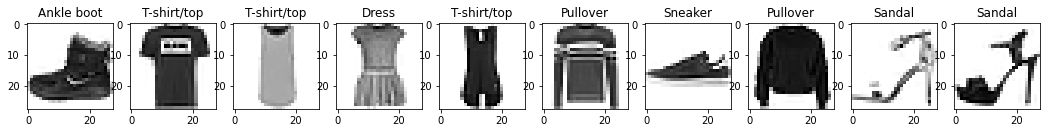

In [5]:
plt.figure(figsize=(20,10))

#display the 10 image in training data
for i in range (1,11):
    plt.subplot(1,11,i)
    plt.imshow(x_train[i-1,:,:], cmap='gray_r')
    plt.title(label_names[y_train[i-1]])



In [6]:
#flattern the data
#change from matrixs to array of dimension 28*28 to array of dimension 784
x_train=x_train.reshape((len(x_train)), np.prod(x_train.shape[1:]))  #(60000,784)
x_test=x_test.reshape((len(x_test)), np.prod(x_test.shape[1:]))

#change to float datatype
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalization from [0:255] to [0:1] // scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255

#convert labels to one_hot vectors
y_train=np_utils.to_categorical(y_train) 
y_test=np_utils.to_categorical(y_test) 


In [7]:
#create model
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) #Hidden Layer 1
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

#configure the network
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
165/165 [==============================] - 2s 10ms/step - loss: 0.0497 - accuracy: 0.9819 - val_loss: 0.4883 - val_accuracy: 0.9022
Epoch 2/10
165/165 [==============================] - 2s 10ms/step - loss: 0.0399 - accuracy: 0.9860 - val_loss: 0.4951 - val_accuracy: 0.9016
Epoch 3/10
165/165 [==============================] - 2s 11ms/step - loss: 0.0373 - accuracy: 0.9872 - val_loss: 0.5188 - val_accuracy: 0.9012
Epoch 4/10
165/165 [==============================] - 2s 10ms/step - loss: 0.0358 - accuracy: 0.9877 - val_loss: 0.5485 - val_accuracy: 0.8987
Epoch 5/10
165/165 [==============================] - 2s 11ms/step - loss: 0.0371 - accuracy: 0.9869 - val_loss: 0.5760 - val_accuracy: 0.8975
Epoch 6/10
165/165 [==============================] - 2s 11ms/step - loss: 0.0398 - accuracy: 0.9856 - val_loss: 0.5656 - val_accuracy: 0.9018
Epoch 7/10
165/165 [==============================] - 2s 10ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.5870 - val_accuracy: 0.8993

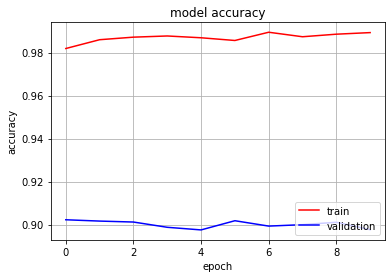

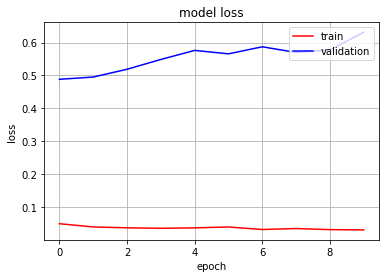

In [19]:
#tarining model fitting
myhistory=model.fit(x_train, y_train, epochs=10, batch_size=256 , validation_split=0.3)

#plotting metrics
#plot the accuracy curve
fig=plt.figure()
plt.plot(myhistory.history['accuracy'],'r')
plt.plot(myhistory.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='lower right')
plt.grid()

#plot the loss curves
fig=plt.figure()
plt.plot(myhistory.history['loss'],'r')
plt.plot(myhistory.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.grid()



In [20]:
#evaluation
#prediction labels
Y_pred=model.predict(x_test)
y_pred= np.argmax(Y_pred, axis=1)

#evaluation the trained model
[test_loss, test_acc]= model.evaluate(x_test, y_test)
print('test loss=',test_loss)
print('test accuracy=', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.7290 - accuracy: 0.8907
test loss= 0.7290086150169373
test accuracy= 0.8906999826431274


In [ ]:
#Confusion matrix
cm=confusion_matrix(y_pred,y_test)

#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);
